In [1]:
## define the function for Power Vestas 

In [2]:
import pandas as pd

# Define the function to calculate power based on wind speed
def calculate_power(wind_speed_150m):
    if wind_speed_150m < 3:
        return 0
    elif 3 <= wind_speed_150m < 11.1:
        return 10.96787072 * (wind_speed_150m ** 3)
    elif 11.1 <= wind_speed_150m <= 32:
        return 15000
    else:
        return 0


In [3]:
import pandas as pd

def calculate_full_load_hours_per_year(df, power_column, timestamp_column, installed_capacity, time_step_hours=1):
    """
    Calculate the Full Load Hours (FLH) for wind power production on a yearly basis.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the time series data of power output.
    power_column (str): The name of the column containing power output (in MW).
    timestamp_column (str): The name of the column containing the timestamps.
    installed_capacity (float): The installed capacity of the wind farm (in MW).
    time_step_hours (float): The time step between data points in hours (default is 1 hour).
    
    Returns:
    pd.DataFrame: DataFrame with Full Load Hours calculated for each year.
    """
    
    # Convert the timestamp column to datetime if not already
    df[timestamp_column] = pd.to_datetime(df[timestamp_column])
    
    # Extract the year from the timestamp column
    df['year'] = df[timestamp_column].dt.year
    
    # Step 1: Group by year and calculate the total energy produced for each year
    df['energy_produced'] = df[power_column] * time_step_hours  # Calculate energy produced in MWh for each row
    
    # Group by year and sum the energy produced for each year
    yearly_energy = df.groupby('year')['energy_produced'].sum().reset_index()
    
    # Step 2: Calculate Full Load Hours for each year
    yearly_energy['full_load_hours'] = yearly_energy['energy_produced'] / installed_capacity
    
    return yearly_energy[['year', 'full_load_hours']]

# Example usage:
# Assuming df_BE is the DataFrame with your data, 'power' is the power column, and 'timestamp' is the timestamp column
# installed_capacity is in MW, and time_step_hours = 1 for hourly data


In [4]:
## loading weather data
# Belgium
historical_wind_5159_0279_BE = pd.read_parquet('/work/Data/openmeteo/historical_wind_5159_0279_BE.parquet')
# Netherland
historical_wind_5214_0345_NL = pd.read_parquet('/work/Data/openmeteo/historical_wind_5214_0345_NL.parquet')
# Germany
historical_wind_5413_0716_DE = pd.read_parquet('/work/Data/openmeteo/historical_wind_5413_0716_DE.parquet')
# Denmark
historical_wind_5645_0807_DK = pd.read_parquet('/work/Data/openmeteo/historical_wind_5645_0807_DK.parquet')

In [5]:
## Apply equations and calculate power

historical_wind_5159_0279_BE['power'] = historical_wind_5159_0279_BE['wind_speed_150m'].apply(calculate_power)
historical_wind_5214_0345_NL['power'] = historical_wind_5214_0345_NL['wind_speed_150m'].apply(calculate_power)
historical_wind_5413_0716_DE['power'] = historical_wind_5413_0716_DE['wind_speed_150m'].apply(calculate_power)
historical_wind_5645_0807_DK['power'] = historical_wind_5645_0807_DK['wind_speed_150m'].apply(calculate_power)

In [6]:
installed_capacity = 15000  # Example value, replace with actual
flh_per_year_BE = calculate_full_load_hours_per_year(historical_wind_5159_0279_BE, power_column='power', timestamp_column='timestamp', installed_capacity=installed_capacity, time_step_hours=1)
flh_per_year_NL = calculate_full_load_hours_per_year(historical_wind_5214_0345_NL, power_column='power', timestamp_column='timestamp', installed_capacity=installed_capacity, time_step_hours=1)
flh_per_year_DE = calculate_full_load_hours_per_year(historical_wind_5413_0716_DE, power_column='power', timestamp_column='timestamp', installed_capacity=installed_capacity, time_step_hours=1)
flh_per_year_DK = calculate_full_load_hours_per_year(historical_wind_5645_0807_DK, power_column='power', timestamp_column='timestamp', installed_capacity=installed_capacity, time_step_hours=1)
# Display the results
print(flh_per_year_BE)
flh_per_year_BE['full_load_hours'].mean()


   year  full_load_hours
0  2015      4659.970536
1  2016      5156.080902
2  2017      3890.394051
3  2018      3907.798383
4  2019      3864.738081
5  2020      3282.451919
6  2021      4008.711067
7  2022      4030.127698
8  2023      3346.077310


4016.261105229167

In [7]:
print(flh_per_year_DE)
flh_per_year_DE['full_load_hours'].mean()

   year  full_load_hours
0  2015      3257.114926
1  2016      3737.986260
2  2017      3254.936429
3  2018      3371.247839
4  2019      3245.951076
5  2020      3249.963211
6  2021      3751.860750
7  2022      3344.720833
8  2023      3594.958773


3423.1933441287215

In [8]:
print(flh_per_year_NL)
flh_per_year_NL['full_load_hours'].mean()


   year  full_load_hours
0  2015      3546.100095
1  2016      4088.581302
2  2017      3742.514846
3  2018      3762.062251
4  2019      3750.238370
5  2020      3328.559269
6  2021      3964.315977
7  2022      3974.260730
8  2023      3343.396281


3722.225457726606

In [9]:
print(flh_per_year_DK)
flh_per_year_DK['full_load_hours'].mean()


   year  full_load_hours
0  2015      3509.750962
1  2016      3969.581818
2  2017      4488.820230
3  2018      4844.304256
4  2019      4625.905665
5  2020      4366.345996
6  2021      4946.728636
7  2022      4482.668676
8  2023      4765.213945


4444.368909508647

In [10]:
flh_per_year = flh_per_year_BE
#rename columns
flh_per_year.rename(columns={'full_load_hours':'full_load_hours_BE'}, inplace=True)
flh_per_year ['full_load_hours_NL'] = flh_per_year_NL['full_load_hours']
flh_per_year ['full_load_hours_DE'] = flh_per_year_DE['full_load_hours']
flh_per_year ['full_load_hours_DK'] = flh_per_year_DK['full_load_hours']
flh_per_year

,year,full_load_hours_BE,full_load_hours_NL,full_load_hours_DE,full_load_hours_DK
0,2015,4659.970536,3546.100095,3257.114926,3509.750962
1,2016,5156.080902,4088.581302,3737.986260,3969.581818
2,2017,3890.394051,3742.514846,3254.936429,4488.820230
3,2018,3907.798383,3762.062251,3371.247839,4844.304256
4,2019,3864.738081,3750.238370,3245.951076,4625.905665
5,2020,3282.451919,3328.559269,3249.963211,4366.345996
6,2021,4008.711067,3964.315977,3751.860750,4946.728636
7,2022,4030.127698,3974.260730,3344.720833,4482.668676
8,2023,3346.077310,3343.396281,3594.958773,4765.213945


In [23]:
flh_per_year.mean()


year                  2019.000000
full_load_hours_BE    4016.261105
full_load_hours_NL    3722.225458
full_load_hours_DE    3423.193344
full_load_hours_DK    4444.368910
dtype: float64

In [22]:
flh_per_year.to_parquet('/work/Data/Wind_power/flh_per_year.parquet')
flh_per_year.to_csv('/work/Data/Wind_power/flh_per_year.csv')

In [11]:
historical_wind_5159_0279_BE.to_parquet('/work/Data/Wind_power/historical_wind_5159_0279_BE_power.parquet')
historical_wind_5214_0345_NL.to_parquet('/work/Data/Wind_power/historical_wind_5214_0345_NL_power.parquet')
historical_wind_5413_0716_DE.to_parquet('/work/Data/Wind_power/historical_wind_5413_0716_DE_power.parquet')
historical_wind_5645_0807_DK.to_parquet('/work/Data/Wind_power/historical_wind_5645_0807_DK_power.parquet')

In [12]:
historical_wind_5159_0279_BE

,timestamp,wind_speed_10m,wind_speed_100m,wind_direction_100m,wind_speed_150m,power,year,energy_produced
0,2015-01-01 00:00:00+00:00,25.120159,36.123981,209.886444,37.396206,0.0,2015,0.0
1,2015-01-01 01:00:00+00:00,25.438021,35.501549,210.465469,36.751850,0.0,2015,0.0
2,2015-01-01 02:00:00+00:00,26.674032,37.038036,205.319641,38.342449,0.0,2015,0.0
3,2015-01-01 03:00:00+00:00,26.081993,36.890778,208.565735,38.190006,0.0,2015,0.0
4,2015-01-01 04:00:00+00:00,23.166216,32.599388,226.789886,33.747482,0.0,2015,0.0
...,...,...,...,...,...,...,...,...
78883,2023-12-31 19:00:00+00:00,58.361095,73.186325,228.389954,75.763817,0.0,2023,0.0
78884,2023-12-31 20:00:00+00:00,61.905342,78.040321,230.803589,80.788765,0.0,2023,0.0
78885,2023-12-31 21:00:00+00:00,61.102509,77.412560,226.507370,80.138893,0.0,2023,0.0
78886,2023-12-31 22:00:00+00:00,58.321106,72.577286,233.471054,75.133331,0.0,2023,0.0


In [13]:
(lambda: DeepnoteChart(historical_wind_5159_0279_BE, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"timestamp","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wind_speed_150m","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(historical_wind_5159_0279_BE, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"timestamp","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wind_speed_150m","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

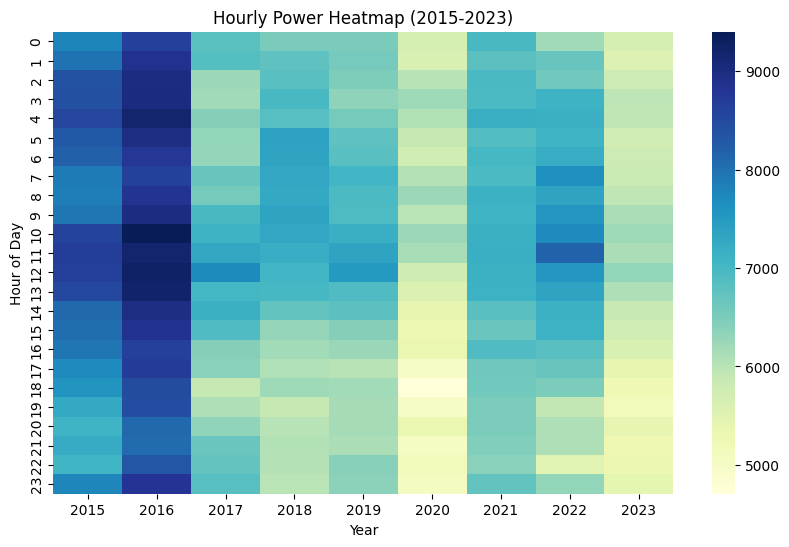

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'historical_wind_5159_0279_BE' is your DataFrame with a 'timestamp' column for dates and 'power' column for the data
df_BE = historical_wind_5159_0279_BE

# Convert timestamp to datetime if not already done
df_BE['timestamp'] = pd.to_datetime(df_BE['timestamp'])

# Extract hour from the timestamp
df_BE['hour'] = df_BE['timestamp'].dt.hour

# You can also extract the year, month, or any other time period to aggregate by
df_BE['year'] = df_BE['timestamp'].dt.year

# Group by year and hour, calculating the mean power for each hour
hourly_power = df_BE.groupby(['year', 'hour'])['power'].mean().reset_index()

# Pivot the data to have hours as rows and years as columns
pivot_table = hourly_power.pivot(index='hour', columns='year', values='power')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)

# Add labels and title
plt.title('Hourly Power Heatmap (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Hour of Day')

# Show the plot
plt.show()


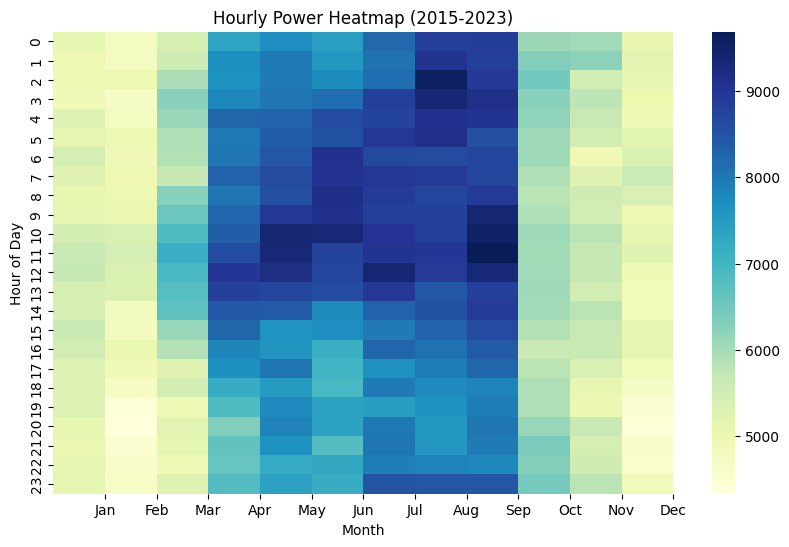

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'historical_wind_5159_0279_BE' is your DataFrame with a 'timestamp' column for dates and 'power' column for the data
df_BE = historical_wind_5159_0279_BE

# Convert timestamp to datetime if not already done
df_BE['timestamp'] = pd.to_datetime(df_BE['timestamp'])

# Extract hour and month from the timestamp
df_BE['hour'] = df_BE['timestamp'].dt.hour
df_BE['month'] = df_BE['timestamp'].dt.month

# Group by month and hour, calculating the mean power for each hour-month combination
hourly_power = df_BE.groupby(['month', 'hour'])['power'].mean().reset_index()

# Pivot the data to have hours as rows and months as columns
pivot_table = hourly_power.pivot(index='hour', columns='month', values='power')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)

# Add labels and title
plt.title('Hourly Power Heatmap (2015-2023)')
plt.xlabel('Month')
plt.ylabel('Hour of Day')

# Set month names as x-axis labels
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


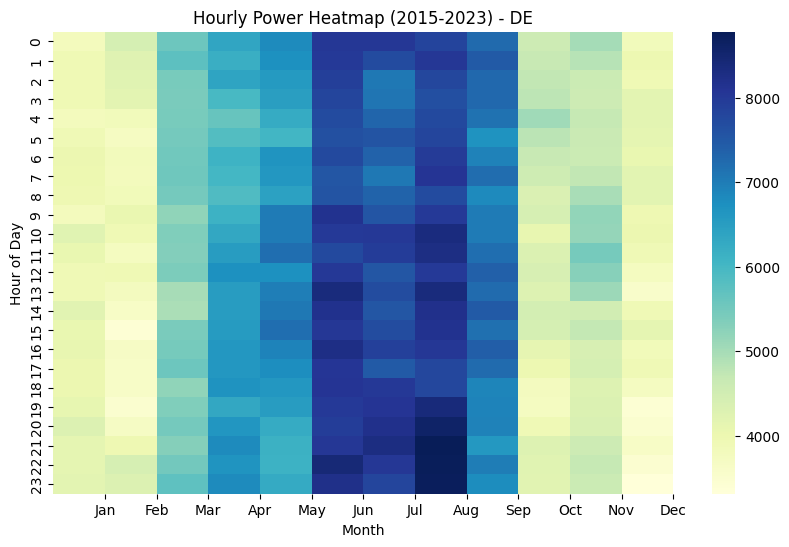

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'historical_wind_5413_0716_DE' is your DataFrame with a 'timestamp' column for dates and 'power' column for the data
df_DE = historical_wind_5413_0716_DE

# Convert timestamp to datetime if not already done
df_DE['timestamp'] = pd.to_datetime(df_DE['timestamp'])

# Extract hour and month from the timestamp
df_DE['hour'] = df_DE['timestamp'].dt.hour
df_DE['month'] = df_DE['timestamp'].dt.month

# Group by month and hour, calculating the mean power for each hour-month combination
hourly_power_DE = df_DE.groupby(['month', 'hour'])['power'].mean().reset_index()

# Pivot the data to have hours as rows and months as columns
pivot_table_DE = hourly_power_DE.pivot(index='hour', columns='month', values='power')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_DE, cmap='YlGnBu', annot=False)

# Add labels and title
plt.title('Hourly Power Heatmap (2015-2023) - DE')
plt.xlabel('Month')
plt.ylabel('Hour of Day')

# Set month names as x-axis labels
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


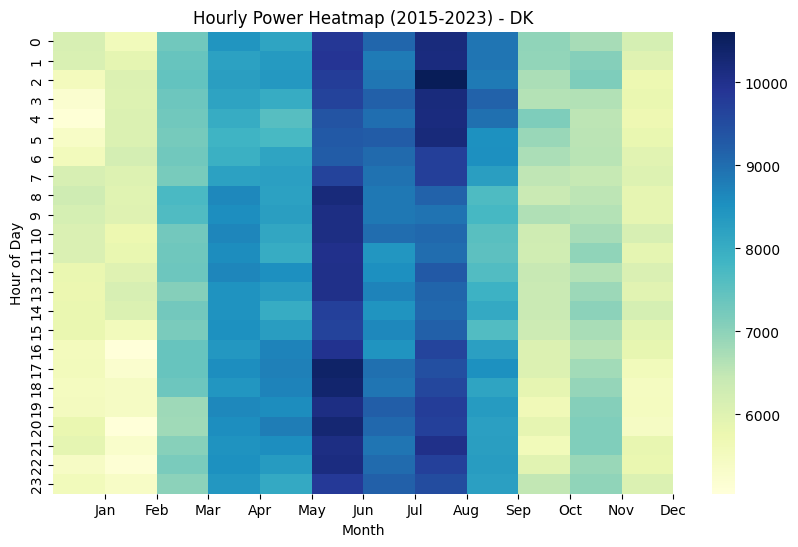

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'historical_wind_5645_0807_DK' is your DataFrame with a 'timestamp' column for dates and 'power' column for the data
df_DK = historical_wind_5645_0807_DK

# Convert timestamp to datetime if not already done
df_DK['timestamp'] = pd.to_datetime(df_DK['timestamp'])

# Extract hour and month from the timestamp
df_DK['hour'] = df_DK['timestamp'].dt.hour
df_DK['month'] = df_DK['timestamp'].dt.month

# Group by month and hour, calculating the mean power for each hour-month combination
hourly_power_DK = df_DK.groupby(['month', 'hour'])['power'].mean().reset_index()

# Pivot the data to have hours as rows and months as columns
pivot_table_DK = hourly_power_DK.pivot(index='hour', columns='month', values='power')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_DK, cmap='YlGnBu', annot=False)

# Add labels and title
plt.title('Hourly Power Heatmap (2015-2023) - DK')
plt.xlabel('Month')
plt.ylabel('Hour of Day')

# Set month names as x-axis labels
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


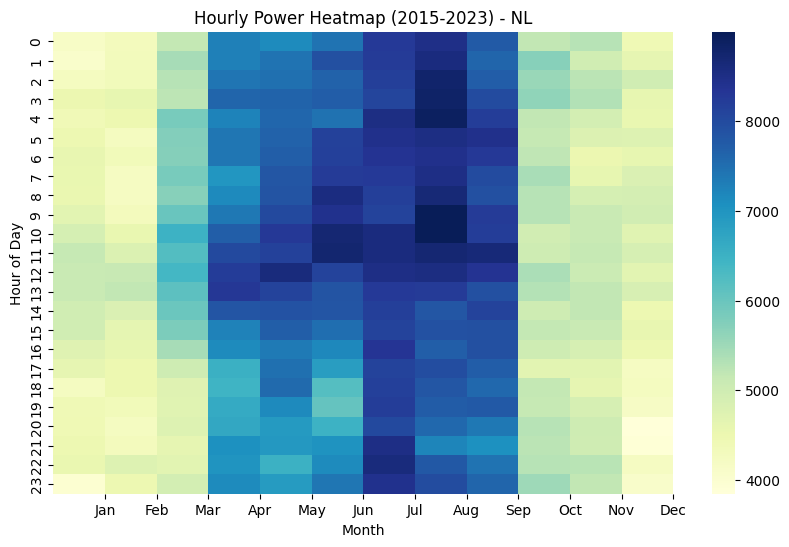

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'historical_wind_5214_0345_NL' is your DataFrame with a 'timestamp' column for dates and 'power' column for the data
df_NL = historical_wind_5214_0345_NL

# Convert timestamp to datetime if not already done
df_NL['timestamp'] = pd.to_datetime(df_NL['timestamp'])

# Extract hour and month from the timestamp
df_NL['hour'] = df_NL['timestamp'].dt.hour
df_NL['month'] = df_NL['timestamp'].dt.month

# Group by month and hour, calculating the mean power for each hour-month combination
hourly_power_NL = df_NL.groupby(['month', 'hour'])['power'].mean().reset_index()

# Pivot the data to have hours as rows and months as columns
pivot_table_NL = hourly_power_NL.pivot(index='hour', columns='month', values='power')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_NL, cmap='YlGnBu', annot=False)

# Add labels and title
plt.title('Hourly Power Heatmap (2015-2023) - NL')
plt.xlabel('Month')
plt.ylabel('Hour of Day')

# Set month names as x-axis labels
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


In [19]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Extract wind speed data
wind_speed_data_BE = historical_wind_5159_0279_BE['wind_speed_150m']

# Fit Weibull distribution to the data
shape_param, loc, scale_param = weibull_min.fit(wind_speed_data_BE, floc=0)

print(f"Weibull shape parameter (k) for BE: {shape_param}")
print(f"Weibull scale parameter (λ) for BE: {scale_param}")


Weibull shape parameter (k) for BE: 2.188586586425382
Weibull scale parameter (λ) for BE: 38.14497185238767


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the index is a datetime index (if not already)
historical_wind_5159_0279_BE.index = pd.to_datetime(historical_wind_5159_0279_BE.index)

# Extract hour, month, and year from the index
historical_wind_5159_0279_BE['hour'] = historical_wind_5159_0279_BE.index.hour
historical_wind_5159_0279_BE['month'] = historical_wind_5159_0279_BE.index.month
historical_wind_5159_0279_BE['year'] = historical_wind_5159_0279_BE.index.year

# Check the original DataFrame
print("Original DataFrame:")
print(historical_wind_5159_0279_BE.head())

# Filter data for the range 2015-2023
filtered_data = historical_wind_5159_0279_BE[
    (historical_wind_5159_0279_BE['year'] >= 2015) &
    (historical_wind_5159_0279_BE['year'] <= 2023)
]

# Print filtered data
print("\nFiltered DataFrame (2015-2023):")
print(filtered_data.head())
print(f"Total records after filtering: {filtered_data.shape[0]}")

# Group data by month and hour, taking the average power for each combination
grouped_data = filtered_data.groupby(['month', 'hour'])['power'].mean().reset_index()

# Print grouped data
print("\nGrouped Data (by month and hour):")
print(grouped_data)

# Check if grouped_data is empty before creating the pivot table
if grouped_data.empty:
    print("\nNo data available for the specified range.")
else:
    # Create a pivot table for the heatmap (hours as rows, months as columns)
    pivot_table = grouped_data.pivot(index='hour', columns='month', values='power')

    # Check if the pivot table is empty
    if pivot_table.empty:
        print("\nPivot table is empty.")
    else:
        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, cmap='coolwarm', annot=False)

        # Add labels and title
        plt.title('Average Hourly Power over Months (2015-2023)', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Hour of Day', fontsize=12)
        plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        plt.show()



Original DataFrame:
                                              timestamp  wind_speed_10m  \
1970-01-01 00:00:00.000000000 2015-01-01 00:00:00+00:00       25.120159   
1970-01-01 00:00:00.000000001 2015-01-01 01:00:00+00:00       25.438021   
1970-01-01 00:00:00.000000002 2015-01-01 02:00:00+00:00       26.674032   
1970-01-01 00:00:00.000000003 2015-01-01 03:00:00+00:00       26.081993   
1970-01-01 00:00:00.000000004 2015-01-01 04:00:00+00:00       23.166216   

                               wind_speed_100m  wind_direction_100m  \
1970-01-01 00:00:00.000000000        36.123981           209.886444   
1970-01-01 00:00:00.000000001        35.501549           210.465469   
1970-01-01 00:00:00.000000002        37.038036           205.319641   
1970-01-01 00:00:00.000000003        36.890778           208.565735   
1970-01-01 00:00:00.000000004        32.599388           226.789886   

                               wind_speed_150m  power  year  energy_produced  \
1970-01-01 00:00:00.00

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6d312a4-2fad-4555-a64a-cb89f1604b41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>